<a href="https://colab.research.google.com/github/1lamoyspencer/FDSFE_LSpencer/blob/main/classDemo/clustering_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import missingno as msno
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [23]:
url = "https://www1.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_2017_consumption_data.xlsx"
df = pd.read_excel(url, "Information and Metrics")

In [24]:
df

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,...,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,...,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,...,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,...,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,...,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34350,34682,6682473,Mitchell Hill- 2802 Clarendon Road,NaN,NaN,3.051940e+09,3-05194-0001,3119966,2802 Clarendon Road,NaN,...,NaN,NaT,187.1,160.2,26.8,295851.5,9019.86,Not found,2019-03-07,Not found
34351,34683,6682474,Mitchell Hill- 1116 Carroll Street,NaN,NaN,3.012880e+09,3-01288-0038,3033818,1116 Carroll Street,NaN,...,NaN,NaT,181.2,157.7,23.5,283262.5,8756.18,Not found,2019-03-07,Not found
34352,34684,6682477,Mitchell Hill- 3033 Brighton 13 Street,NaN,NaN,3.087160e+09,3-08716-0085,3245653,3033 Brighton 13 Street,NaN,...,NaN,NaT,230.4,177.0,53.3,451795.0,13366.71,Not found,2019-03-07,Not found
34353,34685,2819133,The Ritz Tower - 465 Park Avenue,NaN,NaN,1.013128e+09,1-01312-7502,1036922,465 Park Avenue,NaN,...,NaN,NaT,614.8,23.7,591.1,7118.2,27.04,Not found,2019-03-08,Not found


In [25]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2 (self-reported)', 'Postal Code', 'Street Number',
       'Street Name', 'Borough', 'DOF Gross Floor Area (ft²)',
       'Self-Reported Gross Floor Area (ft²)',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'ENERGY STAR Score', 'Source EUI (kBtu/ft²)',


In [26]:
features = df[["Year Built", "Electricity Use - Grid Purchase (kBtu)"]]
features

,Year Built,Electricity Use - Grid Purchase (kBtu)
0,1909,6551394.1
1,1963,616343.7
2,1999,8033914.4
3,1994,1976691.9
4,2012,1022951.6
...,...,...
34350,1931,316524.4
34351,1925,277672.0
34352,1926,629677.8
34353,1910,6979300.9


In [27]:
initial_shape = features.shape
initial_shape

(34355, 2)

In [28]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              34355 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  31576 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 536.9 KB


<Axes: >

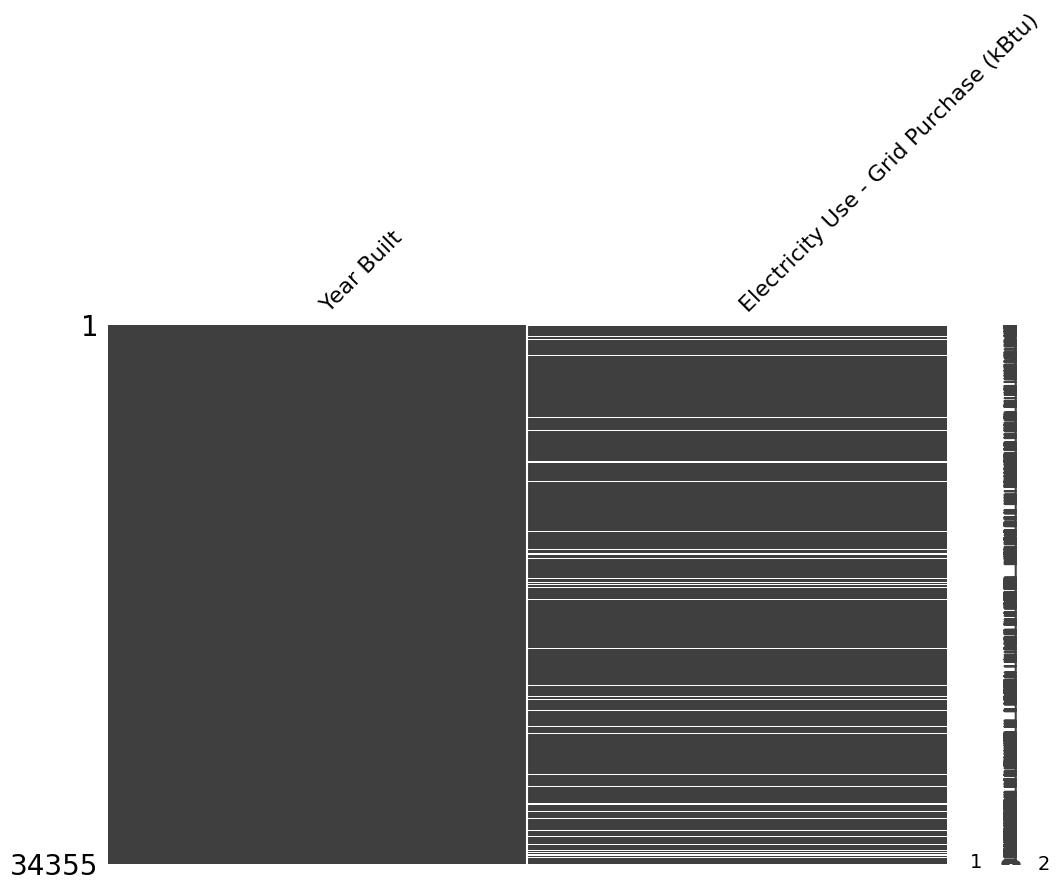

In [29]:
msno.matrix(features, figsize=(12,7)  )

In [30]:
features.dropna(inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31576 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              31576 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  31576 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 740.1 KB


<ipython-input-30-97be9f7e6bb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)


In [31]:
features.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,31576.000000,3.157600e+04
mean,1945.994141,3.833599e+06
std,32.791648,1.249719e+07
min,1051.000000,-6.343300e+03
25%,1924.000000,6.888429e+05
50%,1935.000000,1.249026e+06
75%,1964.000000,2.828563e+06
max,2021.000000,5.742834e+08


In [32]:
features= features[features["Year Built"]> 1900]
feature = features[features["Electricity Use - Grid Purchase (kBtu)"] > 0]

In [33]:
features.shape

(30357, 2)

array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>]],
      dtype=object)

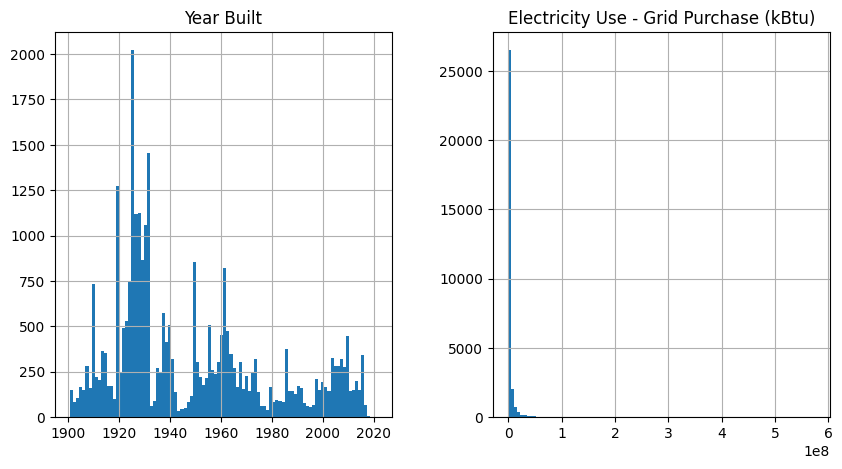

In [34]:
features.hist(figsize=(10,5), bins=100)

In [39]:
year_col= "Year Built"
elec_col = "Electricity Use-Grid Purchase (kBtu)"

KeyError: 'Electricity Use-Grid Purchase (kBtu)'

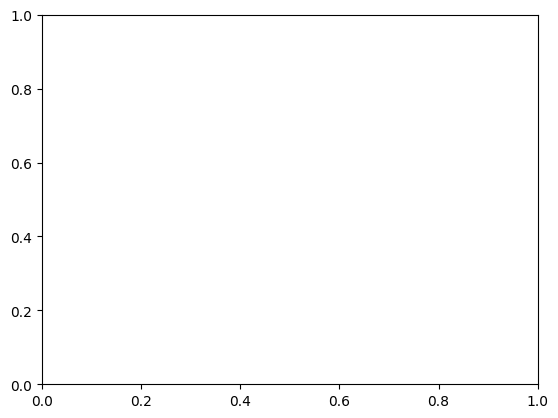

In [40]:
features.plot(year_col, elec_col, kind="scatter", alpha=0.1)

In [51]:
km=kMeans(n_clusters=7,random_state=1415, verbose=True)
km.fit(features)

NameError: name 'kMeans' is not defined

In [52]:
km.n_clusters

7

In [53]:
km.cluster_centers_

array([[ 4.35460530e-01,  2.67985089e+00],
       [-1.11046520e+00, -9.92069931e-02],
       [ 5.73699211e-01,  9.03116951e+00],
       [-3.71067324e-02,  3.39845756e+01],
       [ 4.10818985e-01, -8.12144743e-02],
       [-5.96266623e-01, -1.98316474e-01],
       [ 1.74151069e+00, -5.53516614e-03]])

KeyError: 'Electricity Use-Grid Purchase (kBtu)'

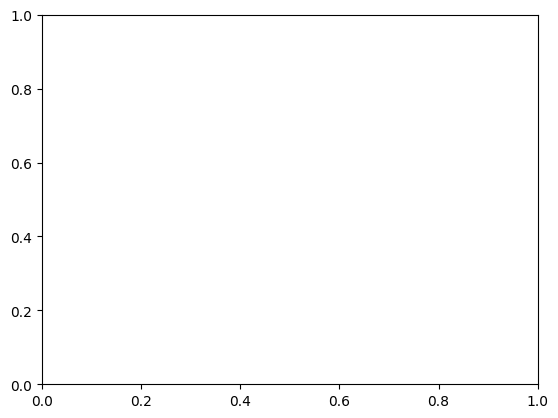

In [54]:
year_col = "Year Built"
electricity_col = "Electricity Use-Grid Purchase (kBtu)"

features.plot(year_col, elec_col, kind="scatter", alpha=0.1)

for i in range(km.n_clusters):
    x = km.cluster_centers_[i, 0]
    y = km.cluster_centers_[i, 1]
    plt.plot(x, y, "wx")


In [55]:
km.labels_

array([1, 4, 6, ..., 5, 1, 4], dtype=int32)

In [56]:
colors = np.array(["r", "g", "b", "c", "m", "y", "k"])
plt.scatter(features[year_col], features[electricity_col], color=colors[km.labels_], alpha=0.5)

for i in range(km.n_clusters):
    x = km.cluster_centers_[i, 0]
    y = km.cluster_centers_[i, 1]
    plt.plot(x, y, "wx")

plt.xlabel("Year built")
plt.ylabel("Electricity use [kBtu]")


KeyError: 'Electricity Use-Grid Purchase (kBtu)'

In [41]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30357 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              30357 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  30357 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 711.5 KB


In [42]:
features.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,30357.000000,3.035700e+04
mean,1948.137728,3.807332e+06
std,30.661456,1.202081e+07
min,1901.000000,-6.343300e+03
25%,1925.000000,6.901372e+05
50%,1937.000000,1.242342e+06
75%,1966.000000,2.802125e+06
max,2021.000000,5.742834e+08


In [43]:
features_scaled = preprocessing.scale(features.values, axis=0)

In [44]:
features_scaled

array([[-1.27646816,  0.22827966],
       [ 0.48472966, -0.26545967],
       [ 1.65886153,  0.35161115],
       ...,
       [-0.72201699, -0.2643504 ],
       [-1.24385338,  0.26387741],
       [ 0.97395127, -0.06910655]])

In [45]:
features_scaled_df = pd.DataFrame(features_scaled, columns=[year_col, electricity_col])

In [46]:
features_scaled_df.describe()

,Year Built,Electricity Use-Grid Purchase (kBtu)
count,3.035700e+04,3.035700e+04
mean,1.647798e-16,2.246997e-17
std,1.000016e+00,1.000016e+00
min,-1.537386e+00,-3.172613e-01
25%,-7.546318e-01,-2.593208e-01
50%,-3.632545e-01,-2.133826e-01
75%,5.825740e-01,-8.362363e-02
max,2.376387e+00,4.745814e+01


array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use-Grid Purchase (kBtu)'}>]],
      dtype=object)

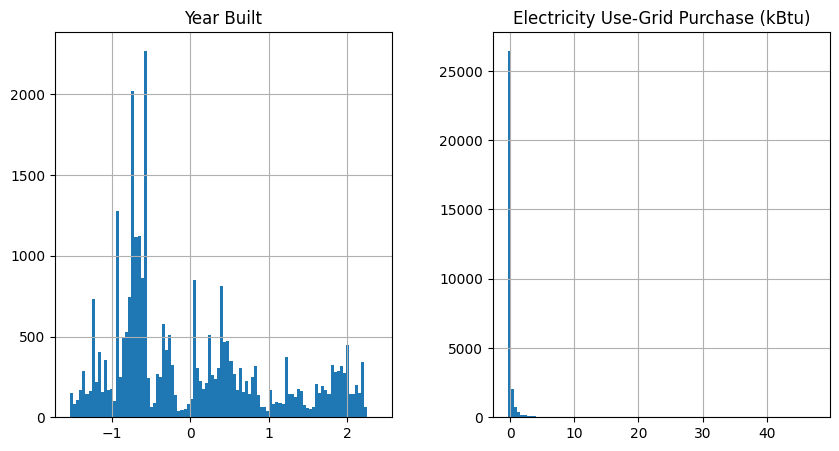

In [47]:
features_scaled_df.hist(figsize=(10,5), bins=100)

In [48]:
km = KMeans(n_clusters=7, random_state=1415, verbose=True)
km.fit(features_scaled_df)

Initialization complete
Iteration 0, inertia 11749.90159103136.
Iteration 1, inertia 9747.454359415444.
Iteration 2, inertia 9497.223459228257.
Iteration 3, inertia 9314.142016096986.
Iteration 4, inertia 9034.70779141262.
Iteration 5, inertia 8490.052788742434.
Iteration 6, inertia 7994.823609863163.
Iteration 7, inertia 7601.302139951228.
Iteration 8, inertia 7398.8813770716715.
Iteration 9, inertia 7229.333786215055.
Iteration 10, inertia 7181.312553365881.
Iteration 11, inertia 7164.748044329037.
Iteration 12, inertia 7157.579041916888.
Iteration 13, inertia 7152.226476220094.
Iteration 14, inertia 7145.399393596095.
Iteration 15, inertia 7139.737301401964.
Iteration 16, inertia 7139.046690861762.
Iteration 17, inertia 7138.003463597606.
Iteration 18, inertia 7089.791847665619.
Iteration 19, inertia 7065.309384100791.
Iteration 20, inertia 7065.200260350746.
Converged at iteration 20: center shift 3.981258580195705e-06 within tolerance 9.999999999999835e-05.


KMeans(n_clusters=7, random_state=1415, verbose=True)

Text(0, 0.5, 'Electricity use [kBtu]')

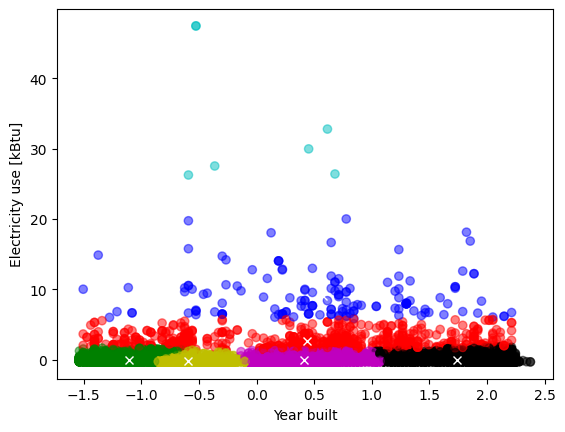

In [49]:
colors = np.array(["r", "g", "b", "c", "m", "y", "k"])
plt.scatter(features_scaled_df[year_col], features_scaled_df[electricity_col], color=colors[km.labels_], alpha=0.5)

for i in range(km.n_clusters):
    x = km.cluster_centers_[i, 0]
    y = km.cluster_centers_[i, 1]
    plt.plot(x, y, "wx")

plt.xlabel("Year built")
plt.ylabel("Electricity use [kBtu]")
